In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("uber.csv")
df


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [2]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [3]:
df['dropoff_longitude'] = df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean())

In [4]:
df['dropoff_latitude'] = df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean())

In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


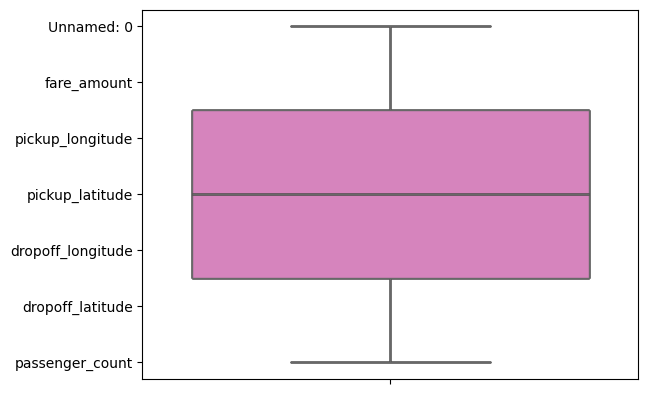

In [7]:
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    sns.boxplot(numeric_cols)

In [8]:
numeric_df = df.select_dtypes(include=['number'])

In [9]:
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                   Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
Unnamed: 0           1.000000     0.000589          0.000230        -0.000341   
fare_amount          0.000589     1.000000          0.010457        -0.008481   
pickup_longitude     0.000230     0.010457          1.000000        -0.816461   
pickup_latitude     -0.000341    -0.008481         -0.816461         1.000000   
dropoff_longitude    0.000270     0.008986          0.833026        -0.774787   
dropoff_latitude     0.000271    -0.011014         -0.846324         0.702367   
passenger_count      0.002257     0.010150         -0.000414        -0.001560   

                   dropoff_longitude  dropoff_latitude  passenger_count  
Unnamed: 0                  0.000270          0.000271         0.002257  
fare_amount                 0.008986         -0.011014         0.010150  
pickup_longitude            0.833026         -0.846324        -0.000414  
pickup_latitude            -0.774787          0.702367 

<Axes: >

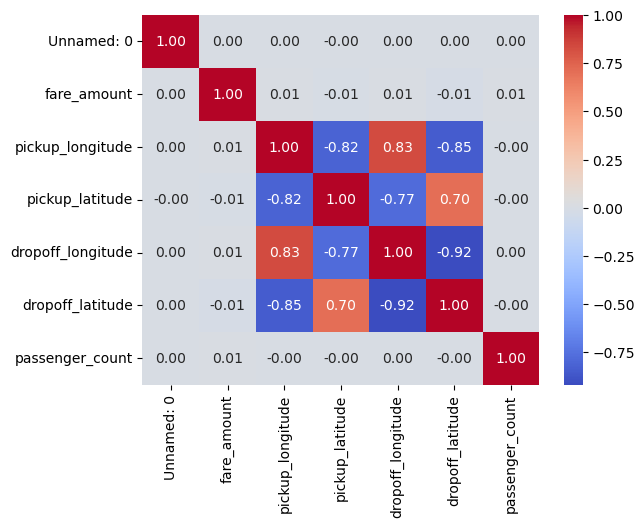

In [10]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [11]:
x = df.drop(['fare_amount'],axis=1)
x=x.select_dtypes(include=['int64','float64'])
y = df['fare_amount']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
r2s=r2_score(y_test, y_pred_lin)

In [17]:
r2s

0.0003284129700408256

In [18]:
mse=mean_squared_error(y_test, y_pred_lin)

In [19]:
mse

106.28609875455433

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [22]:
r2s=r2_score(y_test, y_pred_rf)

In [23]:
r2s

0.6880230821807192

In [24]:
mse=mean_squared_error(y_test, y_pred_rf)

In [25]:
mse

33.16970285711224